In [ ]:
#import modules and packages needed
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#read file as csv
hsp_df = pd.read_csv('data/hospital_readmissions.csv')
hsp_df.head()

In [ ]:
#quick exploration of dataset
hsp_df.info()

In [ ]:
#renaming some columns

hsp_df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)

hsp_df.head()

In [ ]:
#converting age column to categorical data
#checking for the unique values in the age column
print(hsp_df['age'].unique())

#creating a new column called age_cat
hsp_df['age_cat'] = hsp_df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})

print('\n')
#converting column type to categorical data type
hsp_df['age_cat'] = hsp_df['age_cat'].astype('category')
print('dtype :',hsp_df['age_cat'].dtype)

#viewing age and age_cat columns
hsp_df[['age','age_cat']]

In [ ]:
#drop age column
hsp_df.drop('age', axis=1, inplace=True)

#changing data type to the correct data type
# Columns to be converted to categorical datatype
cols_to_convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']

# Convert columns to categorical datatype
hsp_df[cols_to_convert] = hsp_df[cols_to_convert].astype('category')
#checking data type
hsp_df.dtypes

In [ ]:
#checking for duplicates
hsp_df.duplicated().sum()

In [ ]:
#viewing the unique values of each column to check for inconsistent data
cols = hsp_df.columns

for c in cols:
    print(c)
    print('\n',hsp_df[c].unique())

## Data Cleaning

The dataset contained 2500 rows and 17 columns, and these were what I did to the columns:
 - There were no missing or duplicates data in the dataframe.
 
 - The columns named diag_1 ,diag_2,diag_3,change,A1Ctest, were renamed as primary_diagnosis ,sec_diagnos ,additional_sec_diag ,med_change , HbA1ctest respectively

 - For the age column although the wrong categorization done already couldn't be corrected, the various age categories named as [70-80), [50-60),[60-70), [40-50), [80-90),[90-100), were renamed as senior-old age, late-middle age , mid-oldd-age, early-middle age, very senior-old,centenarians respectively. 

 
 - The data type of these rows (medical_specialty, primary_diagnosis , sec_diagnosis, additional_sec_diag, glucose_test, HbA1ctest, med_change, diabetes_med, readmitted)were converted to categorical data type
 

At the end there was 2500 rows and 17 columns .

## EXPLORATORY DATA ANALYSIS

In [ ]:
#using pd.describe to explore numeric columns
hsp_df.describe()

In [ ]:
#describing the categorical columns
hsp_df.describe(exclude=[np.number])

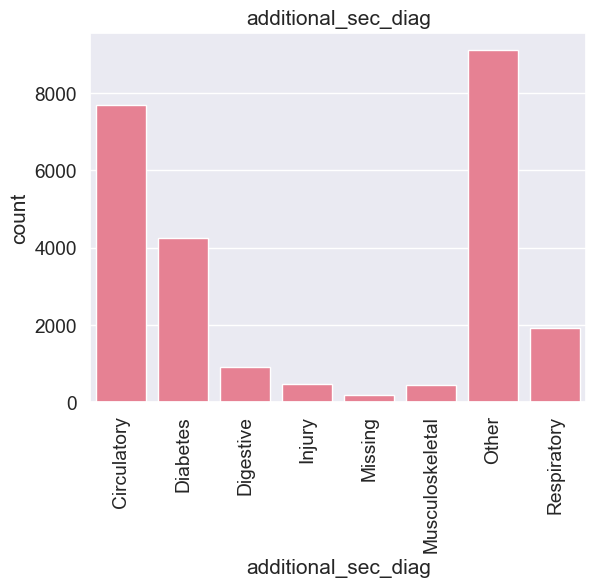

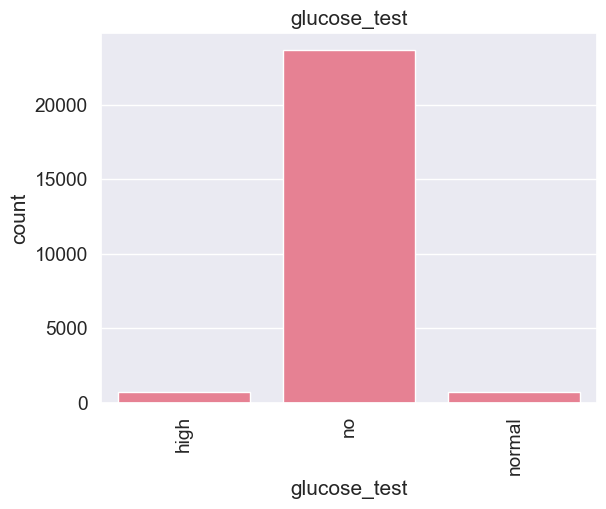

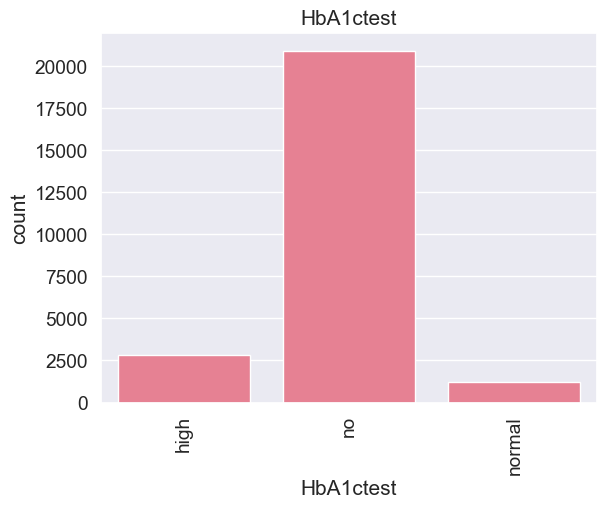

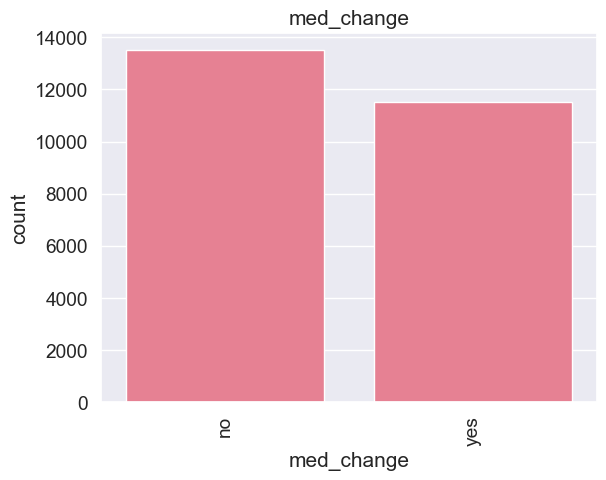

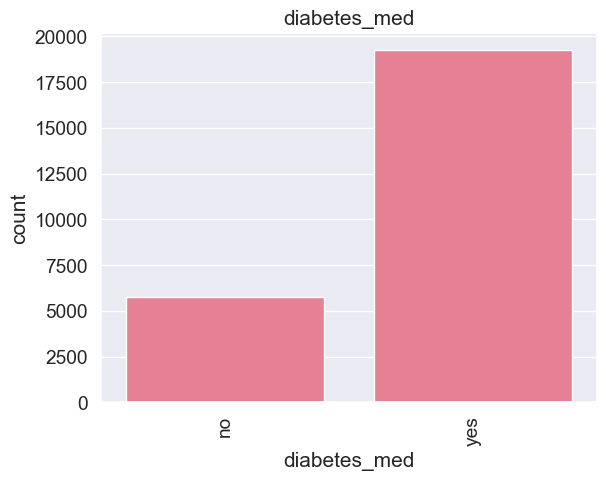

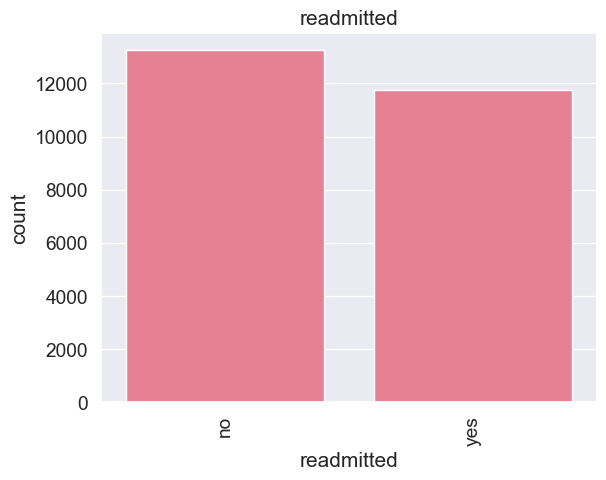

In [129]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns = ['age_cat','medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med','readmitted']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=hsp_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

### MOST COMMON PRIMARY DIAGNOSIS BY AGE GROUP

In [130]:
#using groupby and value_counts to gain insights
df = hsp_df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()
df

C:\Users\jeni7\AppData\Local\Temp\ipykernel_19752\3484125735.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = hsp_df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()


proportion                                          \
primary_diagnosis Circulatory  Diabetes Digestive    Injury   Missing   
age_cat                                                                 
centenarians         0.304000  0.045333  0.100000  0.088000  0.000000   
early-middle age     0.199052  0.145735  0.107030  0.063981  0.000000   
late-middle age      0.282120  0.088275  0.099281  0.061321  0.000000   
mid-old age          0.331811  0.065111  0.093692  0.067648  0.000169   
senior-old age       0.349861  0.056311  0.085564  0.064941  0.000146   
very senior-old      0.328167  0.040080  0.089017  0.071081  0.000443   

                                                         
primary_diagnosis Musculoskeletal     Other Respiratory  
age_cat                                                  
centenarians             0.010667  0.293333    0.158667  
early-middle age         0.039494  0.296209    0.148499  
late-middle age          0.051662  0.261456    0.155885  
mid-old age              0.063081  0.237105    0.141383  
senior-old age           0.054556  0.247623    0.140998  
very senior-old          0.037201  0.281001    0.153012

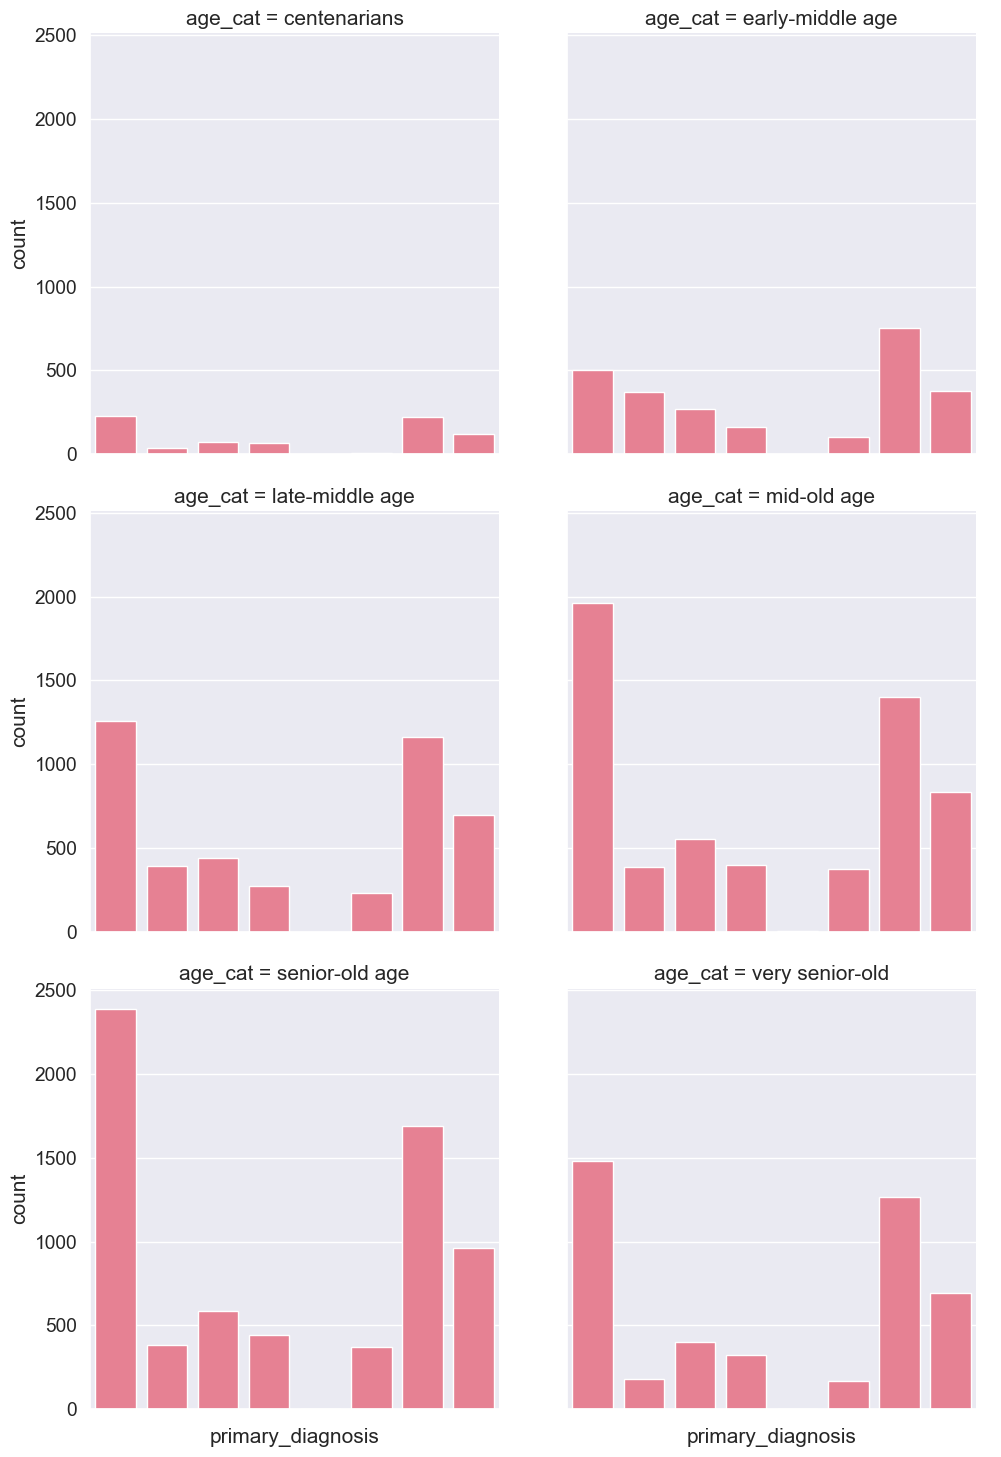

In [131]:
#countplot showing the most common primary diagnosis for each age category
g = sns.catplot(x='primary_diagnosis',col='age_cat', kind='count', data=hsp_df, col_wrap=2)
g.set_xticklabels(rotation=90)
plt.show()

From the table and graph above we can see that Circulatory diagnosis was the most common primary diagnosis across the varoius categories of age outside early middle age where Others as a diagnosis cateory came first and circulatory diagnosis second.

## Explore the effect of a diabetes diagnosis on readmission rates. 

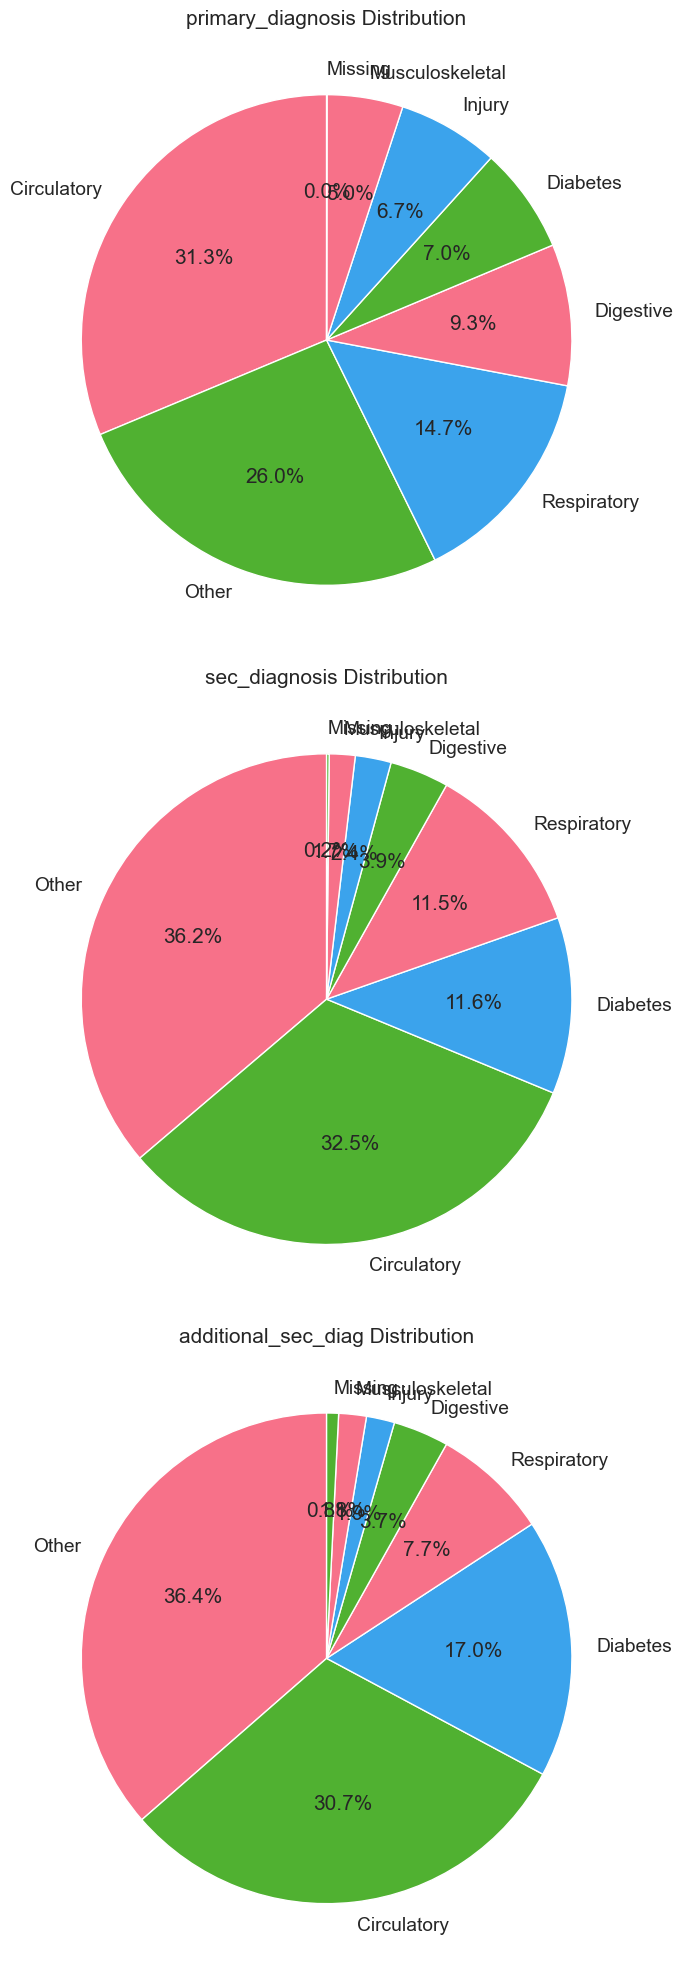

In [132]:
#distribution health conditions for the various diagnosis 

cat_vars = ['primary_diagnosis','sec_diagnosis','additional_sec_diag']

fig,axs = plt.subplots(nrows=3, ncols=1, figsize=(25,20))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = hsp_df[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
        
fig.tight_layout()
plt.show()

In [133]:
#subsetting for patient with DM diagnosis
diabetes_pt = hsp_df[(hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes')]
diabetes_pt.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
12,8,67,0,21,0,0,0,Other,Diabetes,Circulatory,Other,no,normal,no,yes,no,senior-old age
14,2,73,1,26,0,0,0,InternalMedicine,Circulatory,Other,Diabetes,no,no,no,yes,no,very senior-old
16,3,52,0,10,0,0,0,Other,Circulatory,Other,Diabetes,no,no,no,yes,yes,senior-old age
18,7,72,0,13,0,0,0,InternalMedicine,Diabetes,Other,Other,no,high,no,yes,yes,early-middle age


In [134]:
#subsetting patient with non-DM diagnosis
non_diabetes_pt = hsp_df[~((hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes'))]

#numbers of non-DM patient
print('number of non-DM patient: ',len(non_diabetes_pt.index))

#numbers of DM patient
print('number of DM patient: ',len(diabetes_pt.index))

number of non-DM patient:  16212
number of DM patient:  8788


In [135]:
#value counts of DM patients readmitted
diabetes_pt['readmitted'].value_counts(normalize=True)

readmitted
no     0.534706
yes    0.465294
Name: proportion, dtype: float64

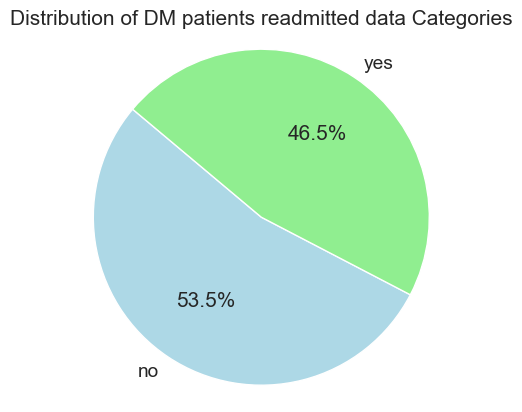

In [136]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.534706,
    'yes'   : 0.465294
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of DM patients readmitted data Categories')

# Show the pie chart
plt.show()


In [137]:
#value counts of non-DM patients readmitted
non_diabetes_pt['readmitted'].value_counts(normalize=True)

readmitted
no     0.527202
yes    0.472798
Name: proportion, dtype: float64

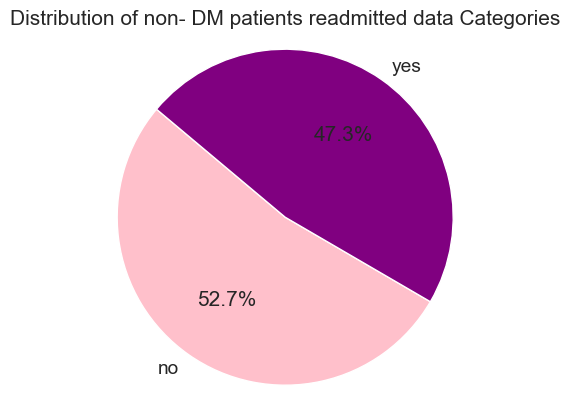

In [138]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.527202,
    'yes'   : 0.472798
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['pink', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non- DM patients readmitted data Categories')

# Show the pie chart
plt.show()


In [139]:
#table showing the count of readmitted patient for each diagnosis
pd.set_option('display.max_rows', 64)
hsp_df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()

C:\Users\jeni7\AppData\Local\Temp\ipykernel_19752\2569994322.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hsp_df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()


readmitted                            \
additional_sec_diag               Circulatory Diabetes Digestive Injury   
primary_diagnosis sec_diagnosis                                           
Circulatory       Circulatory            1724      877        48     66   
                  Diabetes                394       28        12      8   
                  Digestive                26        6        10      0   
                  Injury                   70       21         3     14   
                  Missing                   3        0         0      0   
                  Musculoskeletal           9       11         2      1   
                  Other                   595      381        35     18   
                  Respiratory             378      145        16     15   
Diabetes          Circulatory             133       10        13      6   
                  Diabetes                  2        1         2      0   
                  Digestive                13        2        13      2   
                  Injury                    4        0         1      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          18        0         0      2   
                  Other                   237       25        46     11   
                  Respiratory              35        1         3      1   
Digestive         Circulatory             121       85        39      4   
                  Diabetes                 99        3        38      1   
                  Digestive                60       92        81      3   
                  Injury                    8        3         7      1   
                  Missing                   0        1         0      0   
                  Musculoskeletal           3        4         2      0   
                  Other                   206      174       129     13   
                  Respiratory              56       26        21      2   
Injury            Circulatory             118       74         1     16   
                  Diabetes                 62        5         2      6   
                  Digestive                10       10         6      2   
                  Injury                   36       17         2     27   
                  Missing                   0        5         0      0   
                  Musculoskeletal           6        8         1      2   
                  Other                   172      133        13     51   
                  Respiratory              23        7         2      8   
Missing           Circulatory               0        0         0      0   
                  Diabetes                  1        0         0      0   
                  Digestive                 0        0         0      0   
                  Injury                    0        0         0      0   
                  Missing                   0        0         0      0   
                  Musculoskeletal           0        0         0      0   
                  Other                     0        1         0      0   
                  Respiratory               0        0         0      0   
Musculoskeletal   Circulatory              71      128         5      6   
                  Diabetes                122        5         2      1   
                  Digestive                 7        4         3      2   
                  Injury                    4        5         5      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          22       48         0      4   
                  Other                    95      110         7     13   
                  Respiratory              28       20         0      4   
Other             Circulatory             347      280        34     16   
                  Diabetes                288       17        30     15   
                  Digestive                50       54      

After exploring the data I could deduct that about 8788  patients had Diabetes as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis. This made up about one-third of the patients population.Amongst the DM patient approximately 47 percent were readmitted while 53 percent where not.
While about 16212 patients did not have DM as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis.This makes about two-third of the patients population.Amongst the non-DM patients approximately 47 percent were readmitted while 53 percent were not. From the analysis we cannot really say if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates


## what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

In [140]:
#viewing the dataset
hsp_df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age


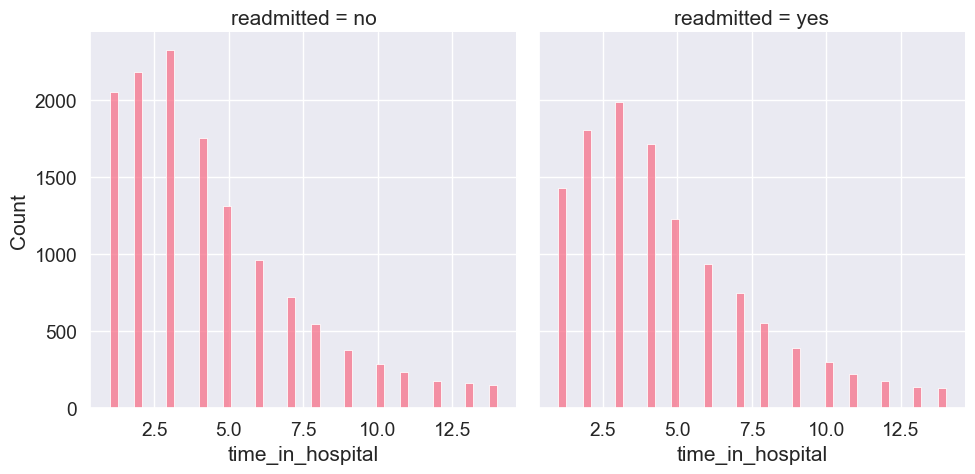

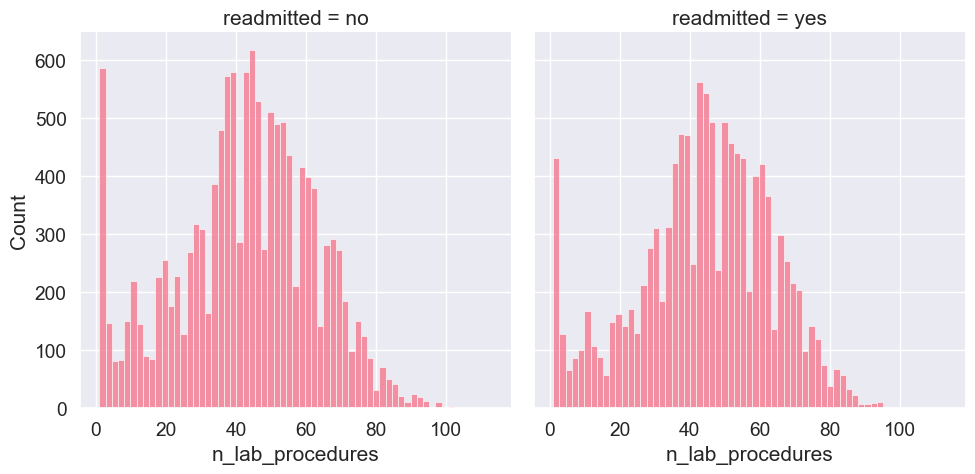

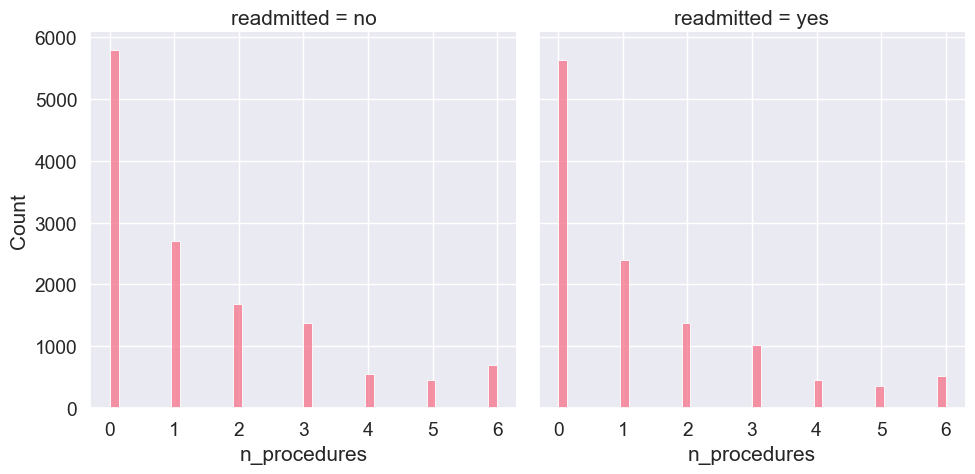

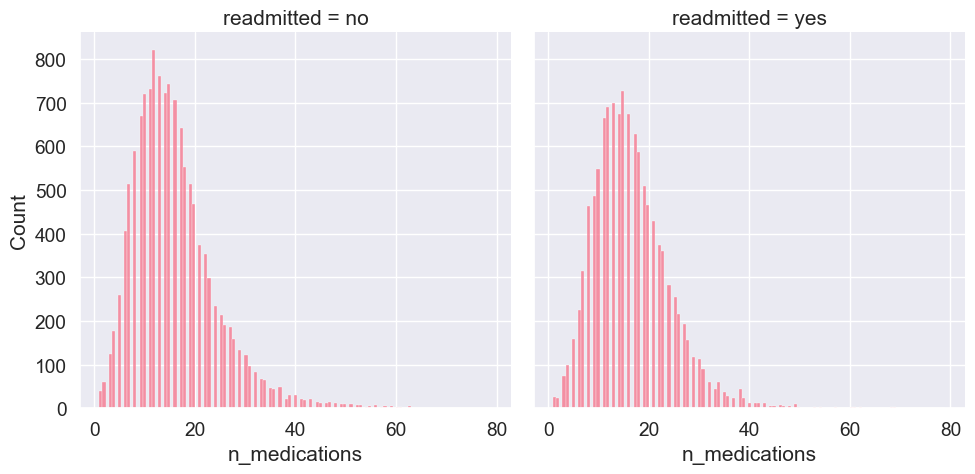

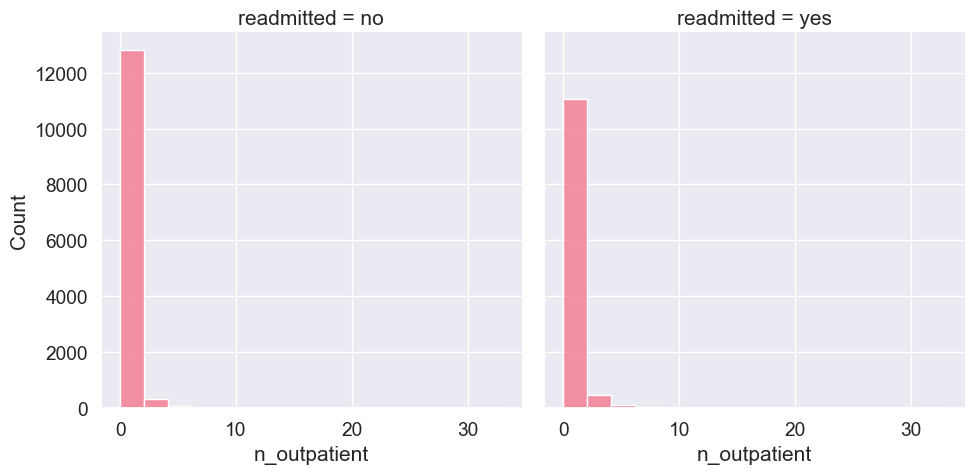

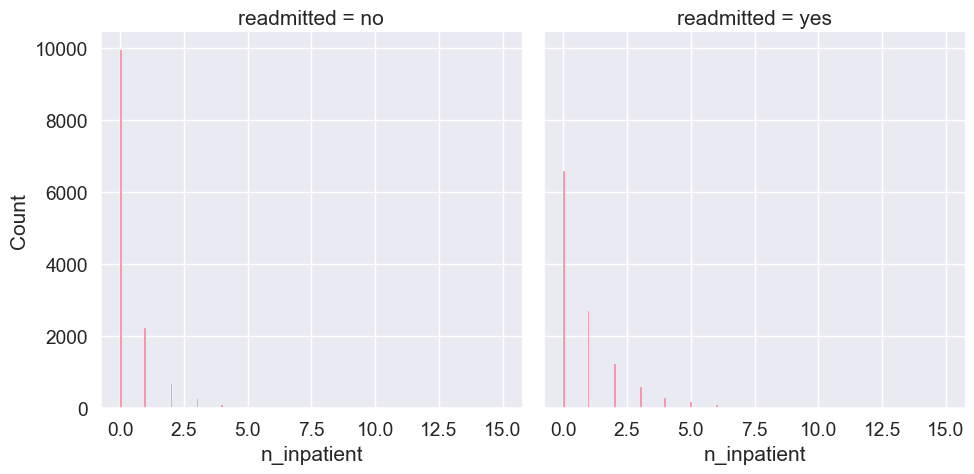

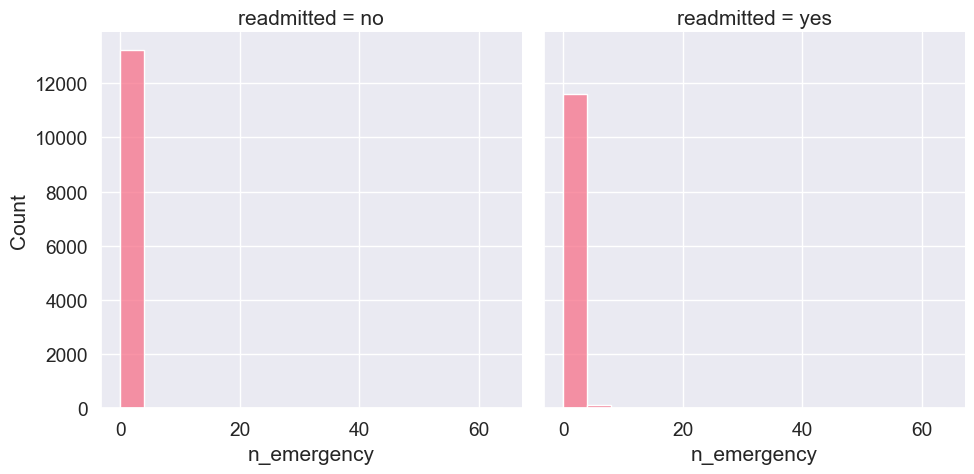

In [141]:
#plotting a grap showing the distribution of numerical columns by their readmitted status
columns = ['time_in_hospital','n_lab_procedures','n_procedures','n_medications','n_outpatient','n_inpatient','n_emergency']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.displot(x=c, data=hsp_df, col='readmitted',col_wrap=2)
        #plt.title(c)
        #plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

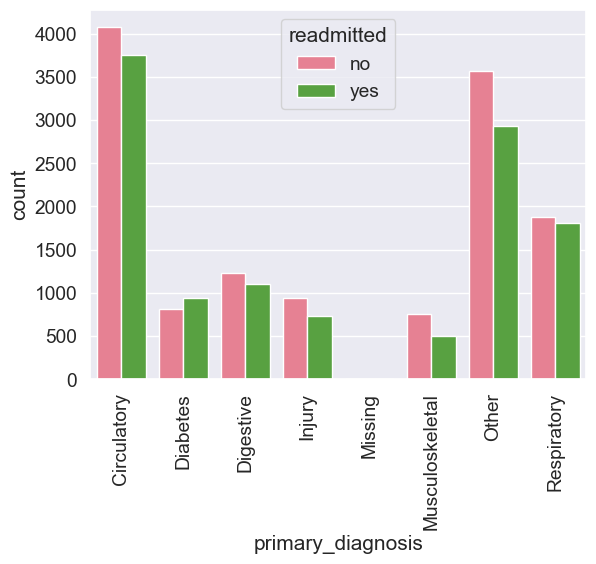

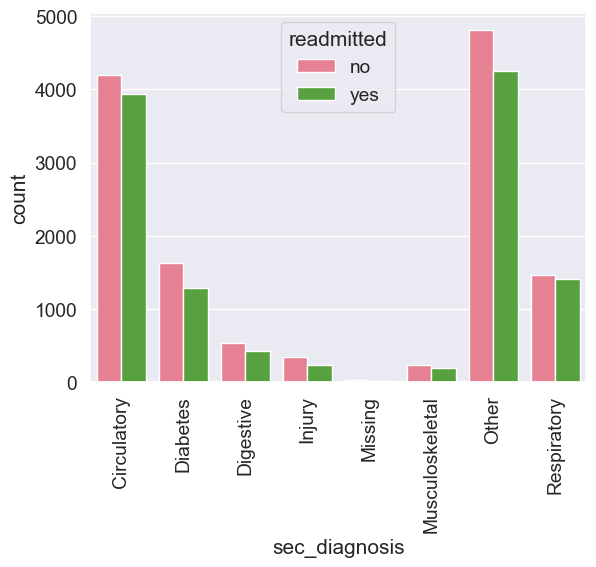

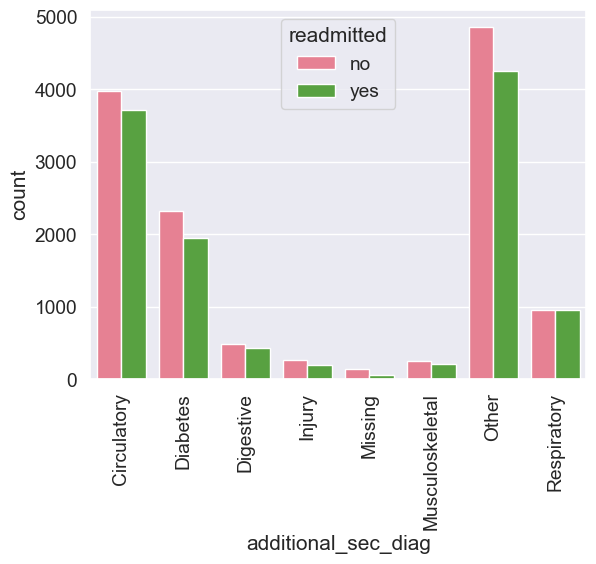

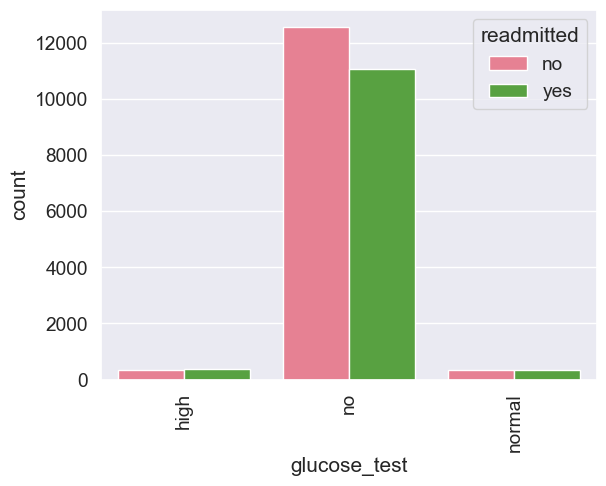

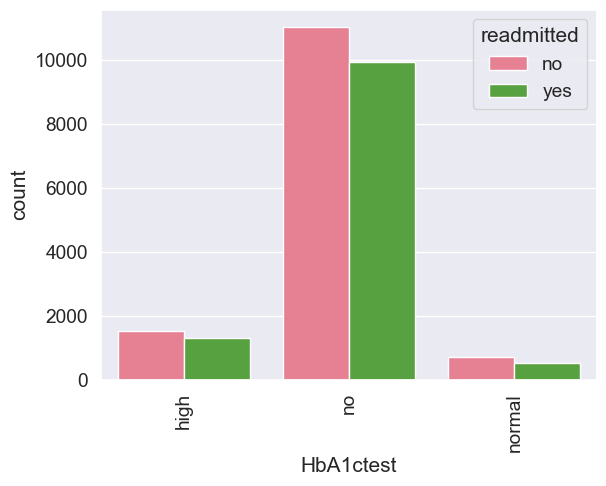

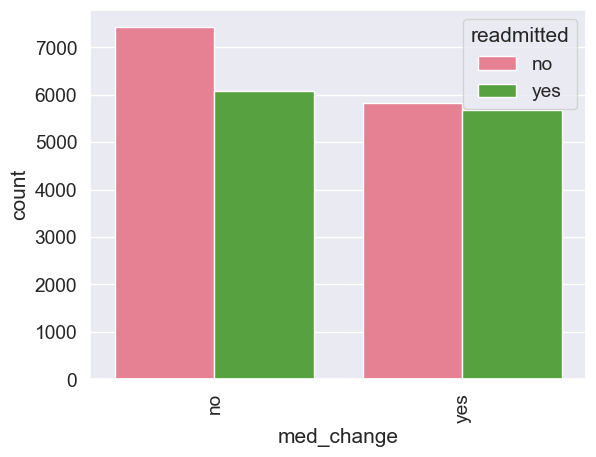

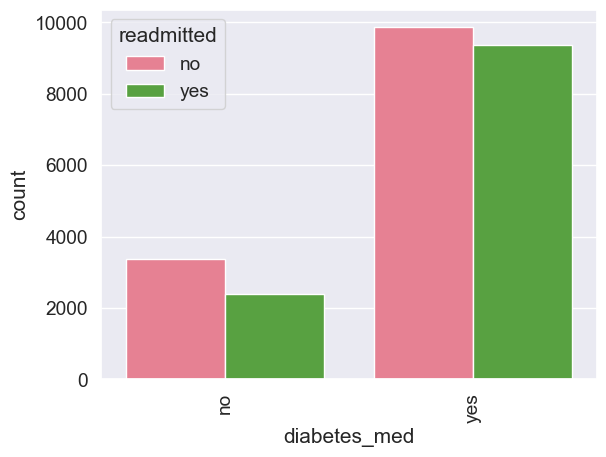

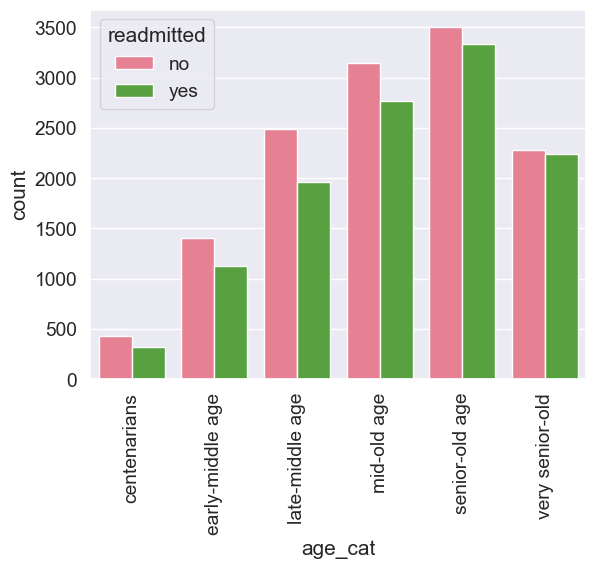

In [142]:
#visualizing the categorical columns by thier readmitted status
columns = ['primary_diagnosis','sec_diagnosis','additional_sec_diag',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat']

def count_plot():
    for c in columns:
        sns.countplot(x=c, hue='readmitted', data=hsp_df)
        plt.xticks(rotation=90)
        plt.show()
        
count_plot()

In [143]:
hsp_df.head(10)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age
5,2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes,early-middle age
6,4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no,late-middle age
7,1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes,mid-old age
8,4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes,very senior-old
9,8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no,senior-old age


In [144]:
#hsp_df['med_change'] = hsp_df['med_change'].map({'yes': 1, 'no': 0})

In [145]:
#hsp_df['glucose_test'] = hsp_df['glucose_test'].map({'normal': 1,'high':2, 'no': 0})
#hsp_df['HbA1ctest'] = hsp_df['HbA1ctest'].map({'normal': 1, 'high':2,'no': 0})
#hsp_df['diabetes_med'] = hsp_df['diabetes_med'].map({'yes': 1, 'no': 0})


In [146]:
hsp_df['age_cat'] = hsp_df['age_cat'].replace({'senior-old age':7,
                                           'late-middle age':5,'mid-old age':6,
                                         'early-middle age':4,'very senior-old':8,'centenarians':9})
hsp_df.head()

C:\Users\jeni7\AppData\Local\Temp\ipykernel_19752\3291009834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hsp_df['age_cat'] = hsp_df['age_cat'].replace({'senior-old age':7,
C:\Users\jeni7\AppData\Local\Temp\ipykernel_19752\3291009834.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hsp_df['age_cat'] = hsp_df['age_cat'].replace({'senior-old age':7,


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,7
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,7
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,5
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,7
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,6


In [147]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Suppose your dataframe is hsp_df
categorical_cols = hsp_df.select_dtypes(include=['category']).columns
print("Categorical Columns:", categorical_cols)

# Exclude the last column
categorical_cols_to_encode = categorical_cols[:-1]

# Encode each column separately
for col in categorical_cols_to_encode:
    le = LabelEncoder()
    hsp_df[col] = le.fit_transform(hsp_df[col].astype(str))  # Convert to string first to handle NaN

hsp_df.head()


Categorical Columns: Index(['medical_specialty', 'primary_diagnosis', 'sec_diagnosis',
       'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change',
       'diabetes_med', 'readmitted', 'age_cat'],
      dtype='object')


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0,7
1,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0,7
2,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1,5
3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1,7
4,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0,6


In [148]:
hsp_df.head(10)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0,7
1,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0,7
2,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1,5
3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1,7
4,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0,6
5,2,51,0,10,0,0,0,4,6,6,6,1,1,0,0,1,4
6,4,44,2,21,0,0,0,4,3,6,6,1,2,1,1,0,5
7,1,19,6,16,0,0,1,5,0,6,6,1,1,0,1,1,6
8,4,67,3,13,0,0,0,3,2,6,6,1,1,0,0,1,8
9,8,37,1,18,0,0,0,2,7,7,6,1,1,1,1,0,7


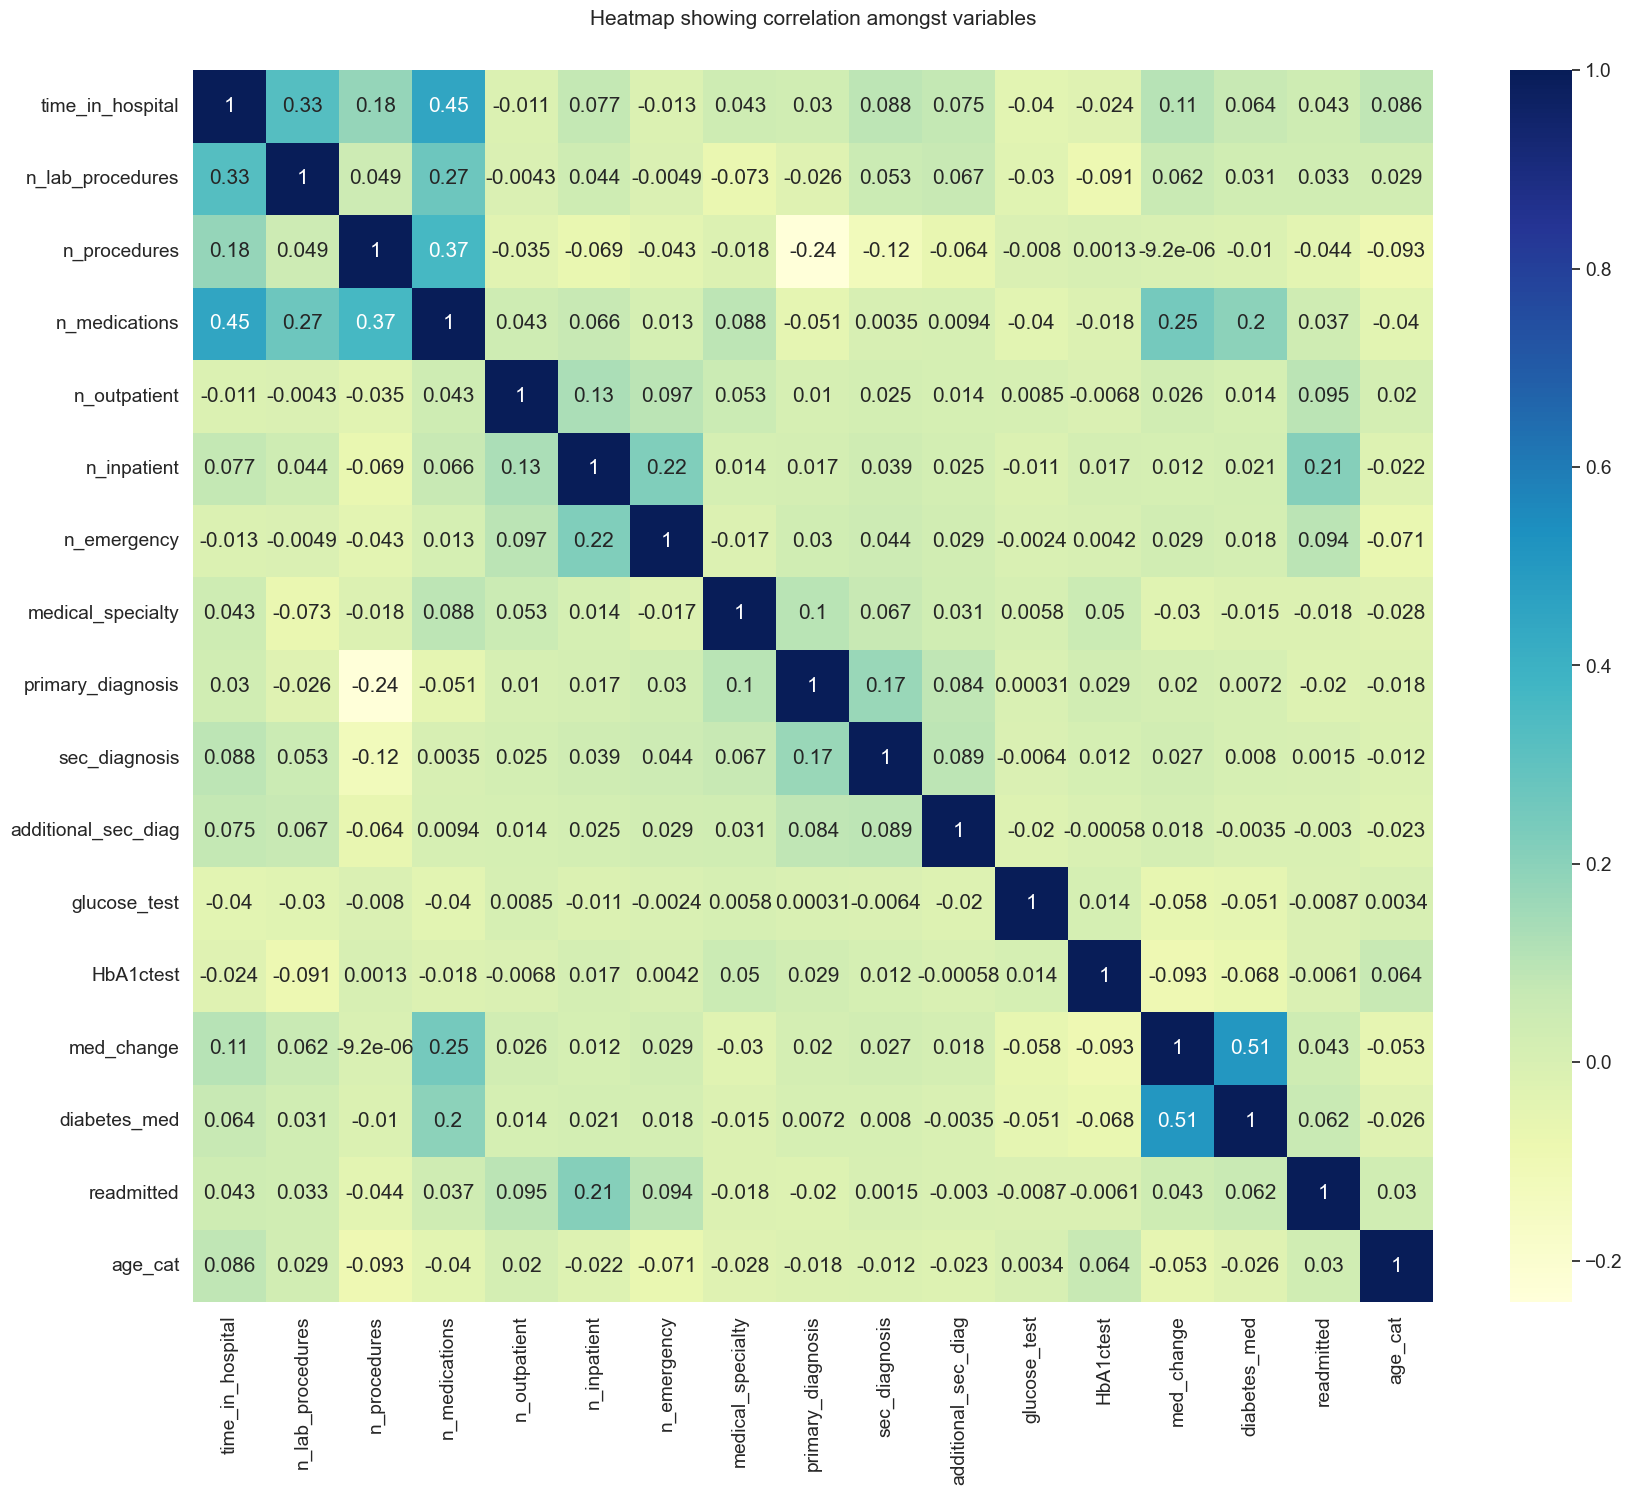

In [149]:

#visualizing correlation between variables
plt.figure(figsize=(20,16))
sns.heatmap(hsp_df.corr(), cmap='YlGnBu', fmt='.2g', annot=True)

plt.title('Heatmap showing correlation amongst variables',y=1.03)
plt.show()

### Data Visualization summary:
From the graphs above, there are no significant factor that could show what group of patient were more likely to be readmitted as their distribution and patterns were alike across all categories of readmitted status.

However, we can notice the heatmap shows a weak correlation between n_inpatient and readmitted

In [151]:
#checking the variance of variables
hsp_df.var()

TypeError: 'Categorical' with dtype category does not support reduction 'var'

**Briefly Note that although we can notice there is a huge difference between the variance of the different columns I wont be standardizing or normalizing the variables as I would be using classification tree models because it has ability to describe non-linear dependencies and it does not require preprocessing of varibales before modelling.**

In [152]:
#preprocessing categorical columns using pd get dummies
#dropping medical_specialty and 'readmitted'
features = hsp_df.drop(['medical_specialty','readmitted'], axis=1)
features

#using pandas get dummies encoder
X_features = pd.get_dummies(features, columns =['primary_diagnosis','sec_diagnosis','additional_sec_diag',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat'])
X = X_features.values

y = hsp_df['readmitted'].values

print('X shape:', X.shape)
print('X_features:',X_features.shape)
print('y shape:', y.shape)

X shape: (25000, 47)
X_features: (25000, 47)
y shape: (25000,)


In [153]:
#checking if the data is balance
hsp_df['readmitted'].value_counts()

readmitted
0    13246
1    11754
Name: count, dtype: int64

In [154]:
#import modules and packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

#train test split features and target varibales
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=23)

In [155]:
names = X_features.columns

### DECISION TREE CLASSIFIER

In [156]:
# define the model
dtc = DecisionTreeClassifier(random_state=2, max_depth=3, min_samples_leaf=0.20)

# fit the model
dtc.fit(X_train, y_train)

test_predictions = dtc.predict(X_test)
train_prediction = dtc.predict(X_train)

#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6026857142857143
Testing_accuracy_score : 0.608
precision_score : 0.6168261562998405
recall_score : 0.4387407827566648


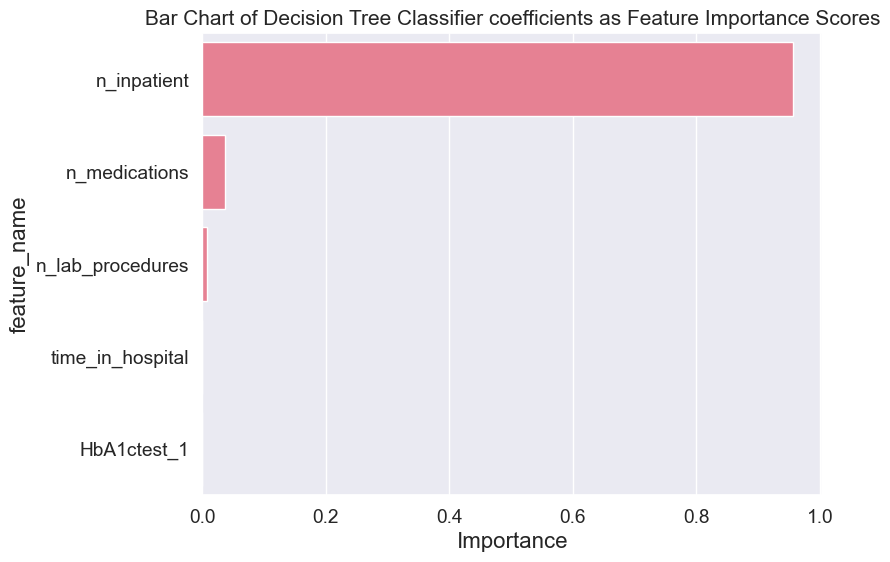

In [157]:
# get importance
importance = dtc.feature_importances_

# plot feature importance
imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Decision Tree Classifier coefficients as Feature Importance Scores')
plt.show()

### RANDOM FOREST CLASSIFIER

In [158]:
# define the model
rfc = RandomForestClassifier(random_state=23,n_estimators=100,max_depth=6)
# fit the model
rfc.fit(X_train, y_train)

test_predictions = rfc.predict(X_test)
train_prediction = rfc.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6302857142857143
Testing_accuracy_score : 0.6097333333333333
precision_score : 0.6165823277539899
recall_score : 0.4492342597844583


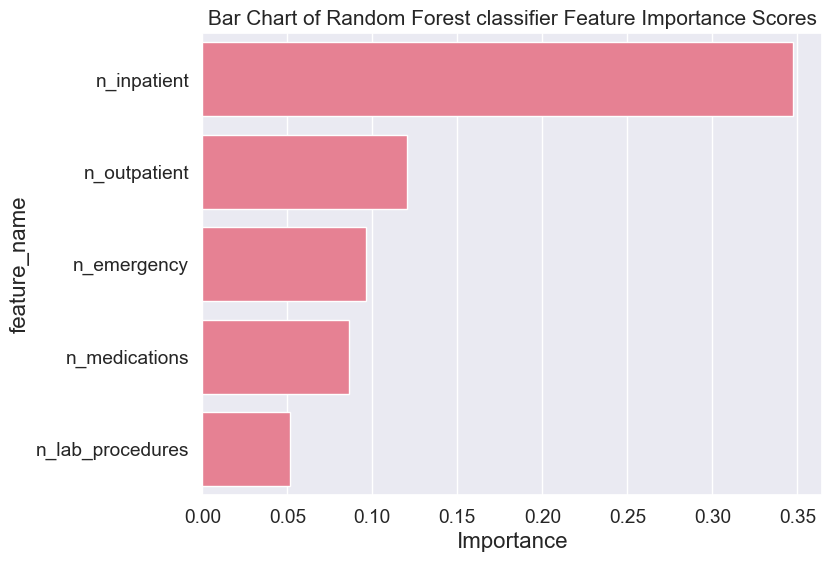

In [159]:
# get importance
importance = rfc.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

## TUNING RANDOM FOREST HYPER-PARAMETERS

In [160]:
#inspecting the hyperparameters of the randomforestclassifier
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 23, 'verbose': 0, 'warm_start': False}


In [161]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=23)

params_rfc = {'max_depth':[3,6,8], 'min_samples_leaf':[0.04, 0.08, 1], 'max_features':['auto','sqrt','log2']}

grid_rfc = GridSearchCV(estimator=rfc , param_grid= params_rfc, scoring='accuracy', cv=10, n_jobs=-1)
grid_rfc.fit(X_train, y_train)

#extract best hyperparameters from grid_rfc
best_hyperparams = grid_rfc.best_params_
print("best_hyperparams: ", best_hyperparams)

#extract best cv score
best_cv_score = grid_rfc.best_score_
print("best_cv_score: ", best_cv_score)

#extract best model
best_model = grid_rfc.best_estimator_
print("best_model: ", best_model)

#evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)
print("test_acc: ",test_acc)

c:\Users\jeni7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jeni7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jeni7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\jeni7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

best_hyperparams:  {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1}
best_cv_score:  0.6140571428571427
best_model:  RandomForestClassifier(max_depth=8, max_features='log2', random_state=23)
test_acc:  0.612


In [ ]:
# define the model
rfc2 = RandomForestClassifier(random_state=23,max_depth=8, max_features= 'log2',min_samples_leaf=1)
# fit the model
rfc2.fit(X_train, y_train)

test_predictions = rfc2.predict(X_test)
train_prediction = rfc2.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix of Tunned RandomForestClassifier')
plt.show()

In [ ]:
# get importance
importance = rfc2.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

## Model Selection

I used **DecisionTreeClassifier** as a baseline model and **RandomForestClassifier** as comparison model.

Firstly looking at their various scores for accuracy,precision and recall the **RandomForestClassifier and the Decision tree classifier performed slightly thesame with the RandomForest classifier having a accuracy_score : 0.60, precision_score : 0.61 and recall_score : 0.44.** while the **decision Tree Classifier had an accuracy_score : 0.60, precision_score : 0.61 and recall_score : 0.43**. 

 **DecisionTreeClassifier**
 A DecisionTreeClassifier provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.
 From the fitted model we observe that **n_inpatient ,n_outpatient, and n_lab_procedures** were the most important feature for predicting a patient readmission.
 
 
**RandomForestClassifier**
 A RandomForestClassifier provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.
 From the fitted model we observe that **n_inpatient ,n_outpatient, and n_emergency** were the most important feature for predicting a patient readmission.
 
 Also, we could we that the accuracy score of both models were pretty low, to obtain the best performance of the randomforest classifier model it was tunned using the Grid search CV approach there was an increase in accuracy score by .1 resulting in the model having an **accuracy score of 0.61**.  From the tunned model we observe that **n_inpatient ,n_outpatient, and n_medications** were the most important feature for predicting a patient readmission.

## Recommendations
From the analysis above, 
1. Circulatory diagnosis was the most common primary diagnosis across the varoius categories of age outside early middle age where Others as a diagnosis category came first and circulatory diagnosis second.

2. On the effects of diabetes diagnosis on readmission ,the analysis doesnt confirms if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates

3. I would recommend for the hospital to focus their follow-up efforts to better monitor patients :
 - who have had high number of inpatient visits in the year before the hospital stay ,that is patient whe had currently been admitted in the hospital before 
 - who have had high number of outpatient visits in the year before the hospital stay, that is patient who had frequented the hospital as an outpatient
 - patients who are on plenty medications
 - patients who under go various lab procedures
 - patients who had being brought to the hospital as an emergency situation before current hospital stay
 
they are very important factors to be considered as they have a high probability to determine if a patient wil be readmitted.